# Data Collection and Formatting

In [37]:
import pandas as pd
import tarfile
from bs4 import BeautifulSoup
import requests
import re
import matplotlib.pyplot as plt
import seaborn as sns

%run -i "functions/unzip.py"
%run -i "functions/scrape_platforms.py"
%run -i "functions/scrape_SotU.py"

# Text Data
### Political Platforms

In [2]:
years = ['1972', '1976', '1980', '1984', '1988', '1992', '1996', 
         '2000', '2008', '2012', '2016']
platforms = scrape_platforms(years)
platforms.head()

,platform,party,year
1972-Rep,\nPreamble\nThis year our Republican Party has...,Republican,1972
1972-Dem,\nNew Directions: 1972-76\nSkepticism and cyni...,Democratic,1972
1976-Rep,\nAdopted by the Republican National Conventio...,Republican,1976
1976-Dem,\nPreamble\nWe meet to adopt a Democratic plat...,Democratic,1976
1980-Rep,\nAdopted by the Republican National Conventio...,Republican,1980


### State of the Union Addresses

In [15]:
scrape_SotU()

,president,year,party,speech
Richard Nixon-1972,Richard Nixon,1972,Republican,"\nMr. Speaker, Mr. President, my colleagues in..."
Richard Nixon-1974,Richard Nixon,1974,Republican,"\nMr. Speaker, Mr. President, my colleagues in..."
Gerald R. Ford-1975,Gerald R. Ford,1975,Republican,"\nMr. Speaker, Mr. Vice President, Members of ..."
Gerald R. Ford-1976,Gerald R. Ford,1976,Republican,"\nMr. Speaker, Mr. Vice President, Members of ..."
Gerald R. Ford-1977,Gerald R. Ford,1977,Republican,"\nMr. Speaker, Mr. Vice President, Members of ..."
Jimmy Carter-1978,Jimmy Carter,1978,Democratic,"\nMr. President, Mr. Speaker, Members of the 9..."
Jimmy Carter-1979,Jimmy Carter,1979,Democratic,"\nMr. President, Mr. Speaker, Members of the 9..."
Jimmy Carter-1980,Jimmy Carter,1980,Democratic,"\nMr. President, Mr. Speaker, Members of the 9..."
Ronald Reagan-1982,Ronald Reagan,1982,Republican,"\nMr. Speaker, Mr. President, distinguished Me..."
Ronald Reagan-1983,Ronald Reagan,1983,Republican,"\nMr. Speaker, Mr. President, distinguished Me..."


### Debates

# Survey Data
### Convert Data to Dataframes
###### Weights
Based on the sample weights provided by the General Social Survey, it appears that some samples were significantly over and underrepresented. In order to account for this weights will be applied to this analysis. 

In [45]:
weights = unzip('Weights')

In [46]:
weights.head()

,year,id,Weight variable
0,1972,0,0.4446
1,1972,1,0.8893
2,1972,2,0.8893
3,1972,3,0.8893
4,1972,4,0.8893


In [48]:
weights['Weight variable'].describe()

count    64814.000000
mean         1.000015
std          0.468172
min          0.391825
25%          0.550100
50%          0.970900
75%          1.098500
max          8.739876
Name: Weight variable, dtype: float64

In [54]:
round(.468172 * 100, 0)

47.0

In [57]:
weights['Weight variable'].iloc[0]

0.4446

###### Abortion Opinions

In [38]:
abortion = unzip('Abortion')

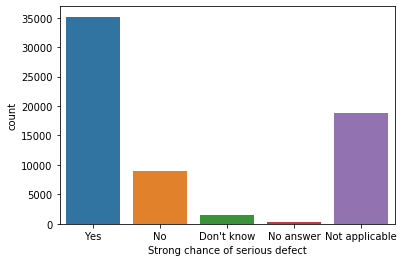

In [15]:
sns.countplot(x= 'Strong chance of serious defect', data= abortion);

In [59]:
new_df = abortion.iloc[0]*2
new_df

year                                                              3944
id                                                                   0
Strong chance of serious defect                                 YesYes
Married--wants no more children                                 YesYes
Woman's health seriously endangered                             YesYes
Low income--cant afford more children                           YesYes
Pregnant as result of rape                                      YesYes
Not married                                                     YesYes
Abortion if woman wants for any reason    Not applicableNot applicable
Name: 0, dtype: object

###### Family/ SES Background

In [16]:
background = unzip('Background')

In [17]:
background.columns

Index(['Gss year for this respondent                       ',
       'Father's occupational prestige score using threshold method (2010)',
       'Rs living standard compared to parents', 'Religion in which raised',
       'How many grandparents born outside u.s.',
       'Were rs parents born in this country', 'Was r born in this country',
       'Mothers highest degree', 'Fathers highest degree',
       'Respondent id number',
       'Mother's occupational prestige score using threshold method (2010)'],
      dtype='object')

In [18]:
background.rename(columns = {'Gss year for this respondent                       ' : 'year'}, inplace = True)

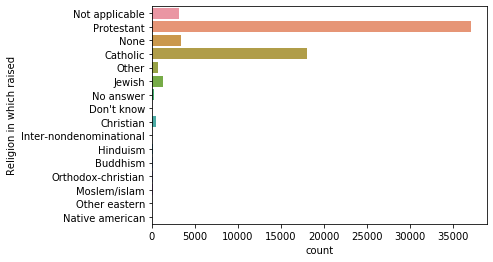

In [20]:
sns.countplot(y= 'Religion in which raised', data= background);

##### Criminal Justice Attitudes

In [21]:
crim_justice = unzip('Criminal_Justice')

In [23]:
crim_justice.rename(columns = {'Gss year for this respondent                       ' : 'year'}, inplace = True)

In [26]:
crim_justice.columns

Index(['year', 'Citizen attacking policeman with fists',
       'Citizen attempting to escape custody',
       'Citizen questioned as murder suspect',
       'Citizen said vulgar or obscene things',
       'Ever approve of police striking citizen',
       'Should marijuana be made legal', 'Courts dealing with criminals',
       'Favor or oppose death penalty for murder', 'Respondent id number',
       'Afraid to walk at night in neighborhood'],
      dtype='object')

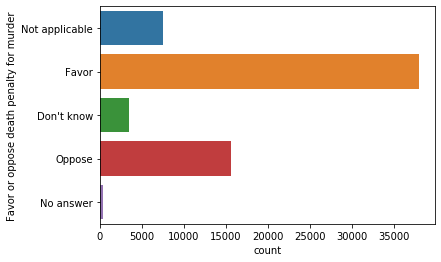

In [27]:
sns.countplot(y= 'Favor or oppose death penalty for murder', data= crim_justice);

##### Education

In [ ]:
education = unzip('Education')

##### Employment

In [ ]:
employment = unzip('Employment')

###### Family Values

In [ ]:
fam_vals = unzip('Family_Values')

###### Gender and Sexuality

In [ ]:
gender = unzip('Gender_and_Sexuality')

###### Identity

In [ ]:
idend = unzip('Identity')

###### Interests

In [ ]:
interests = unzip('Interests')

###### Lifestyle

In [ ]:
lifestyle = unzip('Lifestyle')

###### Opinions

In [ ]:
opinions = unzip('Opinions')

###### Race Relations

In [ ]:
race = unzip('Race_Relations')

###### Religion

In [ ]:
religion = unzip('Religion')

###### Socioeconomic Status

In [ ]:
ses = unzip('SES')

###### Systems

In [ ]:
systems = unzip('Systems')

###### Voter Identity

In [ ]:
vote_id = unzip('Voter_Identity')